[*********************100%%**********************]  1 of 1 completed


5/5 [==============================] - 1s 14ms/step


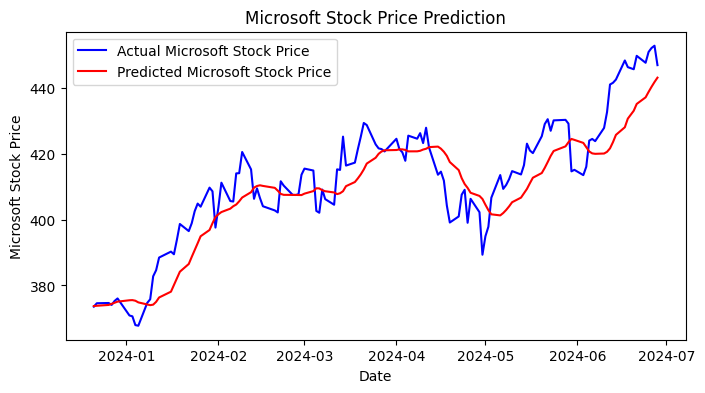

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Fetch historical stock data
data_df = yf.download('MSFT', start='2021-12-01', end='2024-06-30')
stock_name='Microsoft'

# Preprocess data
data = data_df['Close'].values
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split data into training and testing sets
train_data_len = int(len(data) * 0.8)
train_data = data[0:train_data_len, :]
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Test the model accuracy on existing data
test_data = data[train_data_len - 60:, :]
x_test = []
y_test = data[train_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions using the model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test=scaler.inverse_transform(y_test)
dates=data_df.index[train_data_len:]

# Visualize the data
plt.figure(figsize=(8,4))
plt.plot(dates,y_test, color='blue', label='Actual %s Stock Price'%stock_name)
plt.plot(dates,predictions , color='red', label='Predicted %s Stock Price'%stock_name)
plt.title('%s Stock Price Prediction'%stock_name)
plt.xlabel('Date')
plt.ylabel('%s Stock Price'%stock_name)
plt.legend()
plt.show()